# **Group 8 Project - User Knowledge Modeling Data Set**
Authors: Minting Fu, Zeti Batrisha Jamiluddin Amini, Liz Ji, Caroline Zhang

## Introduction

Developing the ability to gain a deep understanding in particular subjects has been a major goal of both students and educational institutions. This calls for the question: what are some strategies that can help us enhance such understanding? In this study, we aim to explore the linkage between knowledge level and some of its potential contributors, by analyzing the <a href='https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling'>User Knowledge dataset</a>. This dataset contains 403 students' knowledge levels in the subject of Electrical DC Machines, and it has the following variables:

* STG : the degree of study time for goal object materails.
* SCG : the degree of repetition number of user for goal object materails.
* STR : the degree of study time of user for related objects with goal object.
* LPR : the exam performance of user for related objects with goal object.
* PEG : the exam performance of user for goal objects.
* UNS : the user knowledge level for goal objects.


We will use this dataset to investigate the following question:
* Is there a relationship between STG, SCG, STR, LPR, PEG and UNS? (ie. Which of STG, SCG, STR, LPR, PEG are contributing factors to UNS and can we predict UNS based on them?)

## Methods & Results

The first thing we do is to import the pacakges we are going to use for the entire project.

In [21]:
# load extra R packages we need
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

In [22]:
# using the set.seed function to make sure our code is reproducible
set.seed(12)

We will download and read the dataset. Since the dataset has been seperated into training and testing data ahead, we will read two datasets seperatedly as `training_data` and `testing_data`. 

In [23]:
# download the file from the website
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls'
download.file(url, destfile='data/user_knowledge_data.xls')

# read the training dataset
training_data <- read_excel('data/user_knowledge_data.xls', sheet=2, range='A1:F259')           
training_data

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


Table1. Raw training dataset.

In [24]:
# read the testing dataset
testing_data <- read_excel('data/user_knowledge_data.xls', sheet=3, range='A1:F146')
testing_data

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


Table2. Raw testing dataset.

As we can see from the two datasets above, they are almost clean. There are few things we do to clean the data:

1. Our target variable `UNS` is in chr type, so we need to change the type of the `UNS` to factor type in order to do further analysis. 
2. We notice that the labels of `UNS` in training set are different from those in testing set. They are lower case letter with underscores in the training set, whereas they are all upper case letter in the testing set. 
3. We will change the `UNS` level's order in the training data to `very_low`, `low`, `high`, and `middle` so that the `UNS` level will be consistent between both training and testing datasets. 
3. We will check whether there are missing data in two datasets.

In [25]:
# unite value format and change the UNS type and order
training_data$UNS = tolower(training_data$UNS)
training_data <- training_data %>%
                 mutate(UNS = factor(UNS, levels = c("very_low", "low", "high", "middle")))
training_data

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,high
0.06,0.06,0.05,0.25,0.33,low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,high
0.50,0.75,0.81,0.61,0.26,middle
0.66,0.90,0.76,0.87,0.74,high


Table3. Clean and tidy training dataset.

In [26]:
# unite value format and change the UNS type and order
testing_data$UNS = tolower(testing_data$UNS)
testing_data <- testing_data %>%
    mutate(UNS = str_replace(UNS, " ", "_")) %>%
    mutate(UNS = as_factor(UNS))
testing_data

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,very_low
0.05,0.05,0.55,0.60,0.14,low
0.08,0.18,0.63,0.60,0.85,high
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,low
0.66,0.68,0.81,0.57,0.57,middle
0.68,0.64,0.79,0.97,0.24,middle


Table4. Clean and tidy testing dataset.

**Now the labels of UNS in training set are the same with those in testing set.**

In [27]:
# test missing values
sprintf("The number of missing data in training data: %s", sum(is.na(training_data)))
sprintf("The number of missing data in testing data: %s", sum(is.na(testing_data)))

[1] "The number of missing data in training data: 0"

[1] "The number of missing data in testing data: 0"

There are no missing values in our training and testing datasets.

And now we can see from each table above:

  1. Each row is a single observation
  2. Each column is a single variable 
  3. Each value is a single cell
  
Therefore, the training set and testing set are clean and tidy now.

We also notice that the proportion of the training data is around 64%, and the proportion of the test data is around 36% from calculation.

### Data Summarization

Now we are going to summarize the training dataset information.

In [28]:
# summarise the maximum value of each predictors
training_data_max <- training_data %>%
                     select(-UNS) %>%
                     map_df(max)
training_data_max

STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.99,0.9,0.95,0.99,0.93


Table5. The mamximum value of each predictors.

In [29]:
# summarise the minimum value of each predictors
training_data_min <- training_data %>%
                     select(-UNS) %>%
                     map_df(min)
training_data_min

STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0


Table6. The minimum value of each predictors.

In [30]:
# summarise the average value of each predictors
training_data_avg <- training_data %>%
                     select(-UNS) %>%
                     map_df(mean)
training_data_avg

STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


Table7. The average value of each predictors.

According to the tables above, we can see the range of each variable is :
* The range of STG, the degree of study time for goal object materails, is [0, 0.99].
* The range of SCG, the degree of repetition number of user for goal object materails, is [0, 0.9].
* The range of STR, the degree of study time of user for related objects with goal object, is [0, 0.95].
* The range of LPR, the exam performance of user for related objects with goal object, is [0, 0.99].
* The range of PEG, the exam performance of user for goal objects, is [0, 0.93].

Now, we have some basic ideas about our dataset. In the next step, We want to know which factor(s) is related to our target variable `UNS`, in other words, which variable(s) can be used to predict UNS. To do this, we need to visualize our data to find out if there is a relationship between `STG`, `SCG`, `STR`, `LPR`, `PEG` and `UNS`.

### Data Visualization

To visualize the data, we will use the `ggpairs` function, which returns a matrix of plots for a given dataset. Since we have 5 potential explanatory variables and 1 target variable, it is better to compare the distibution and evaluate the association of them in a whole. The `ggpairs` function provides an efficient way to exploring the distribution and correlation between different variables.

The `columns` argument is used to select the number of columns we want to include in the plot. In this case, we need to put `1:5` here since we have 5 explanatory variables in total. 

We also need to change the font size of correlation values in order to make it fit in the panel and readable. To change the font size, we need to include `upper = list(continuous = wrap('cor', size = ...)` in our `ggpairs` function.

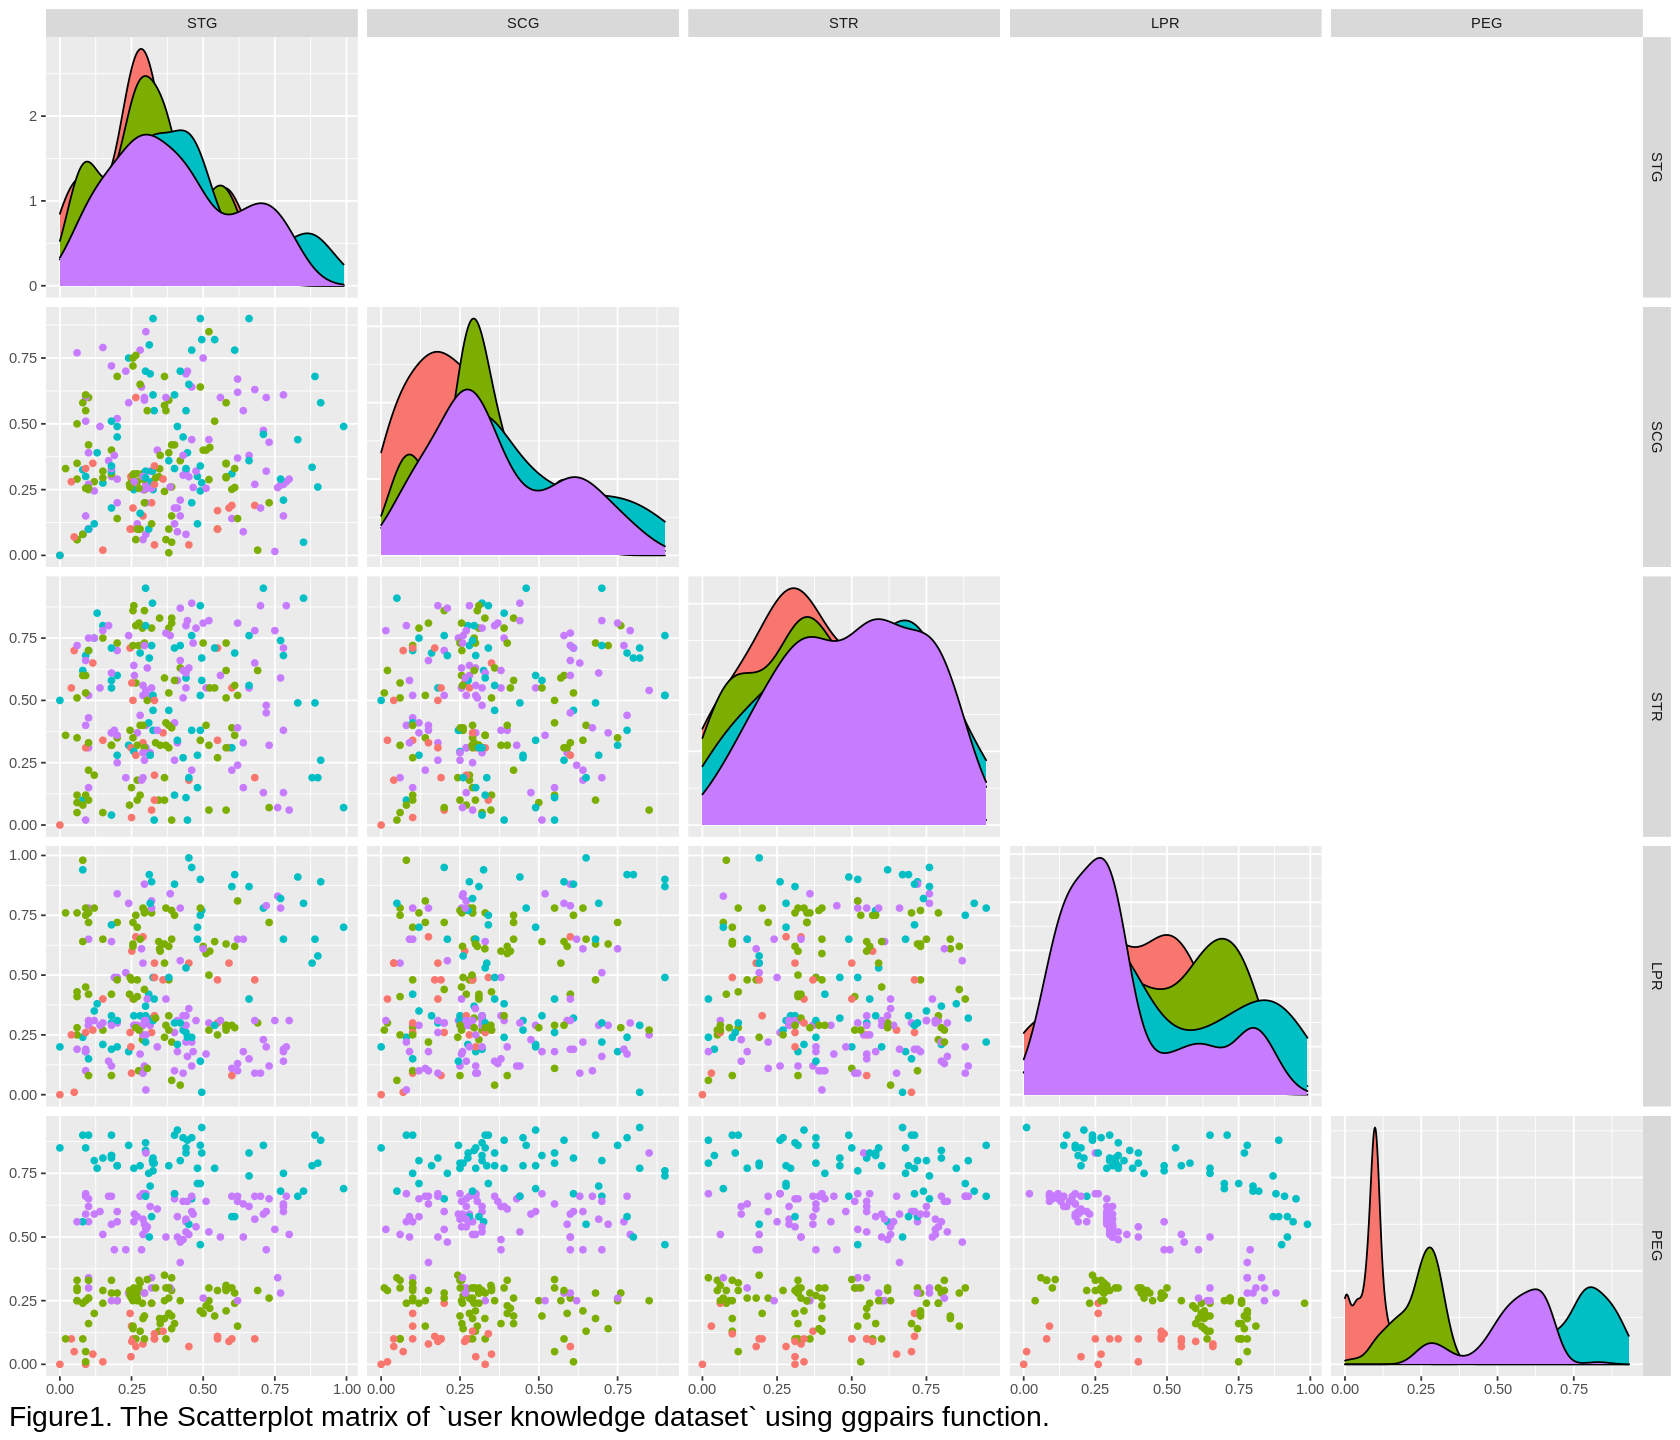

In [31]:
# creating the matrix of plot by using ggpairs function
options(repr.plot.width = 14, repr.plot.height = 12)
relationship_plot <- ggpairs(training_data, 
                             columns = 1:5, 
                             ggplot2 :: aes(color = UNS), 
#                              upper = list(continuous = wrap('cor', size = 5))) +
                             upper = NULL) +
                             labs(caption = "Figure1. The Scatterplot matrix of `user knowledge dataset` using ggpairs function.") +
                             theme(plot.caption.position = "plot", 
                                   plot.caption = element_text(size = 17, hjust =0))
relationship_plot

In this graph, we omitted the `correlation coefficient` that is supposed to be on the upper panel, as it describes the linear relationship between each two of the five quantitative variables (all variables beside UNS) themselves, and is not relevant to their relationships with UNS. The diagnal shows the `density plot` of quantitative variables. The lower left half of the grids shows the `scatterplot` between each two of the five quantitative variables.

Recall from previous information, we have 6 variables in this user knowledge dataset, they are:

* STG : the degree of study time for goal object materails. (Quantitative variable)
* SCG : the degree of repetition number of user for goal object materails. (Quantitative variable)
* STR : the degree of study time of user for related objects with goal object. (Quantitative variable)
* LPR : the exam performance of user for related objects with goal object. (Quantitative variable)
* PEG : the exam performance of user for goal objects. (Quantitative variable)
* UNS : the knowledge level of users.(Categorical variable)


Firstly, we look at the density plots on the diagnal, which represent the distributions of each quantitative variable, classified by UNS. Among all of them, the one representing PEG has the most distinct color groups and the least overlapping between different color groups, meaning different ranges of PEG values clearly correspond to different UNS classifications. To observe the distribution of PEG by different UNS classifications in more detail, we create the histogram below.

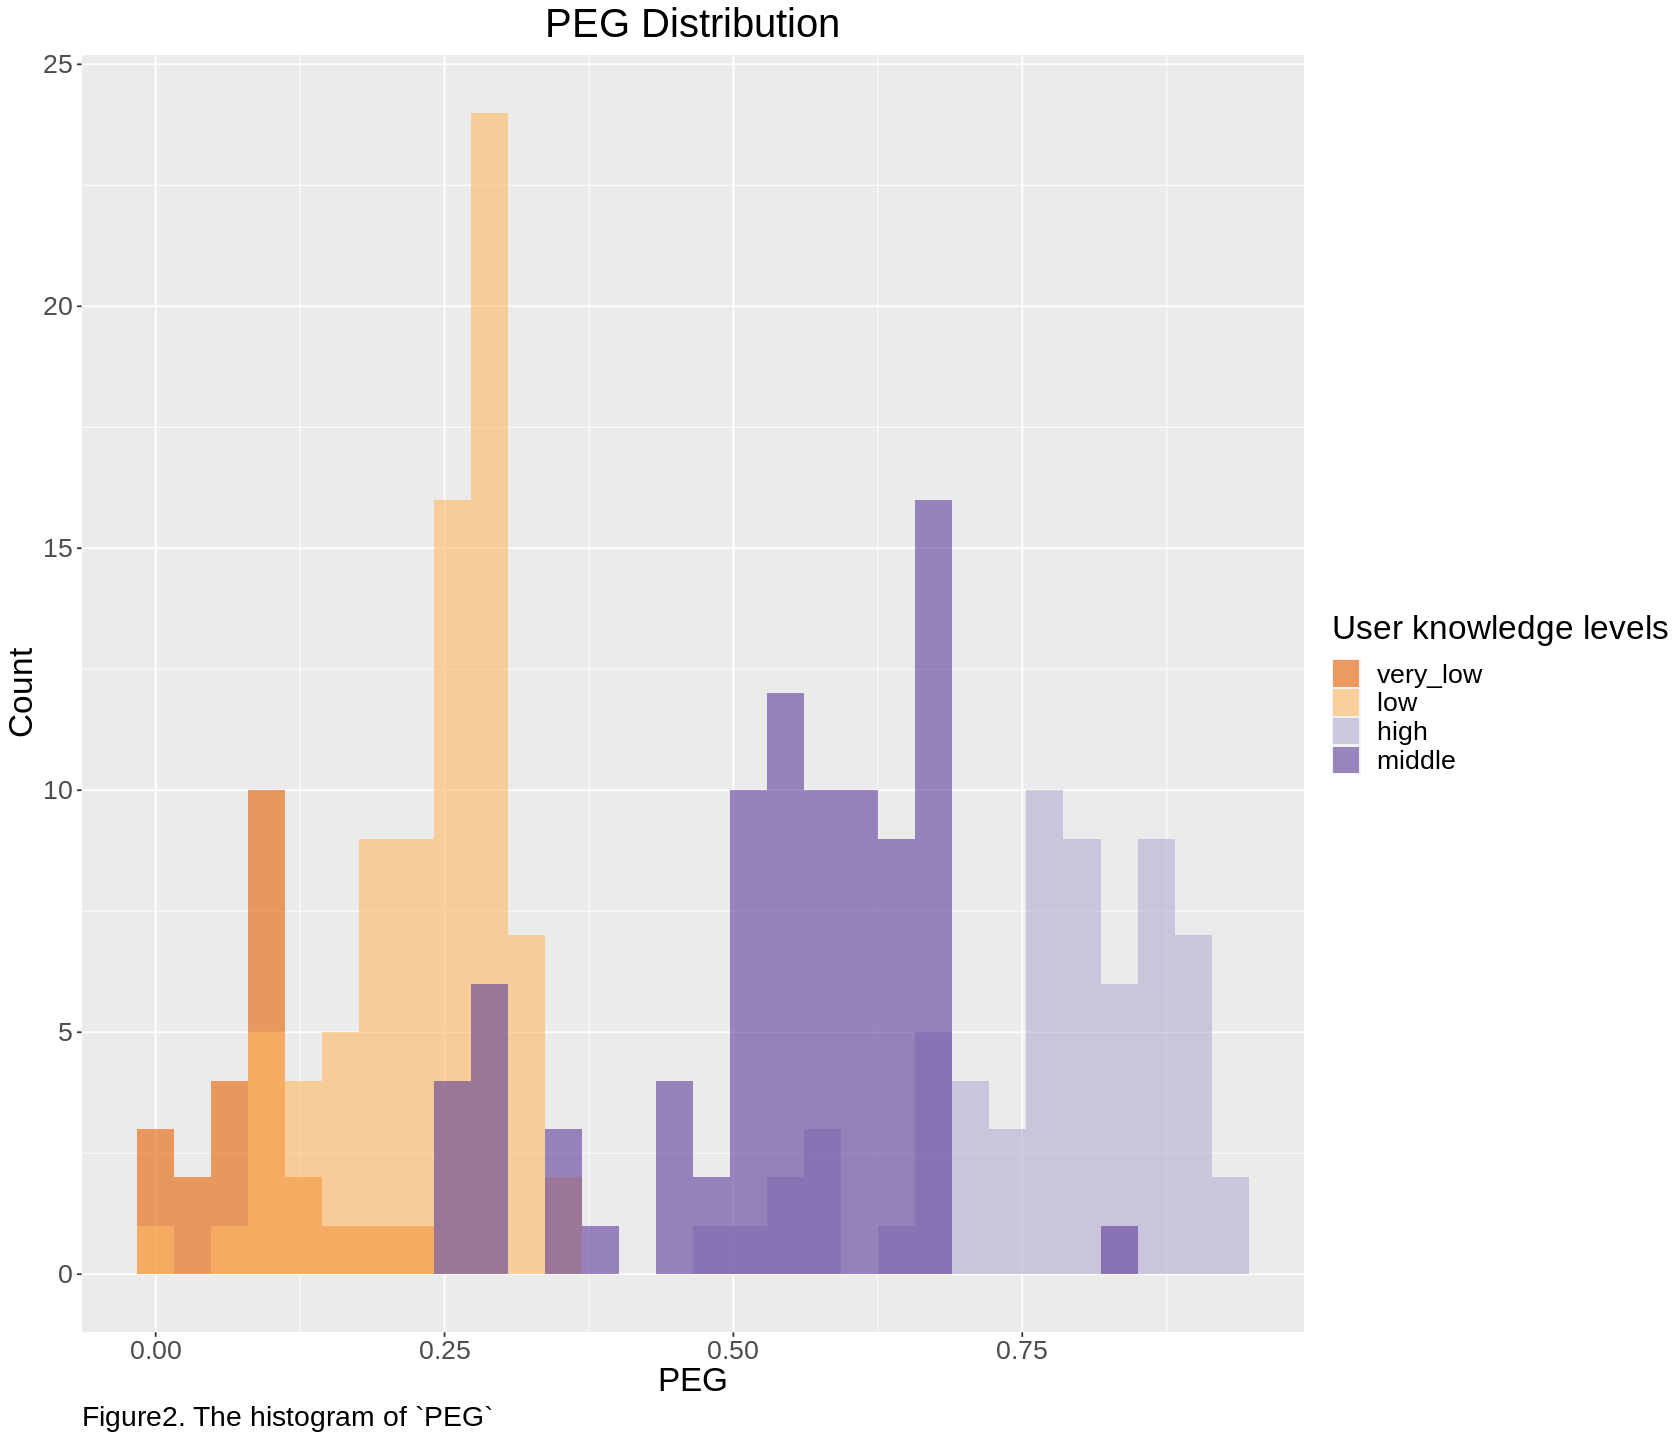

In [32]:
# creating the histogram of peg
peg <- training_data %>%
    ggplot(aes(x = PEG, fill = UNS)) +
    geom_histogram(bins=30, alpha = 0.6, position = "identity") +
    labs(x = "PEG", 
         y = "Count", 
         fill = "User knowledge levels", 
         title = "PEG Distribution", 
         caption = "Figure2. The histogram of `PEG`") +
    theme(text = element_text(size = 20), 
          plot.caption = element_text(size = 17, hjust = 0), 
          plot.title = element_text(hjust = 0.5)) +
    scale_fill_brewer(palette = "PuOr")
peg

According to the histogram, we can see that there are 4 disctinct regions that correspond to 4 different user knowledge levels:

* The interval of "very_low knowledge level" is around [0.00, 0.25].
* The interval of "low knowledge level" is around [0.00, 0.38].
* The interval of "middle knowledge level" is around [0.25, 0.65].
* The interval of "high knowledge level" is around [0.63, 0.90].

4 different user knowledge levles are classified into 4 different regions by PEG. As a result, **PEG is the best, and primary predictor for UNS**.

We now need to find a second predictor among STG, SCG, STR, and LPR to aid our prediction.

The next best alternative density plot is the LPR one. Although there are some overlapping areas on the plot, we can still see 4 relatively distinct coloring group compared to those of the rest variables (STG, SCG, and STR), where all colors almost overlap on top of each other.

To confirm that LPR and PEG are good predictors, we then look at the scatterplots in the lower panel. For all of the scatterplots except for the one between PEG and LPR, we can see that the points are very dispersed, and points of different colors are all mixed together, making them unusable used for classification. Only for the scatterplot PEG and LPR, there are clearly four distinct clusters.

These observations remind us that **LPR may be the next good predictor that we should consider on**.

In addiditon, LPR represents the exam performance of user for related objects with goal object, PEG represents the exam performance of user for goal objects. By our common sense, it's never too much to learn. Also, the more knowledge and skills students study, the better performance they will get in an exam. This idea has been demonstrated by Hartwig, Was, Isaacson and Dunlosky (2011) in their study that a student's general knowledge level (i.e., obtaining materials that related to and beyond class content) has a strong positive relationship with the exam performance. Obtaining high grades on exams regarding both goal objects and  related objects likely indicates a student's high knowledge level.


**To conclude, combining our analysis of the density plots and scatterplots in Figure 1, as well as the study of Hartwig, Was, Isaacson and Dunlosky, we can reason that we are going to use the LPR (the exam performance of uses for related objects with goal object) and PEG (the exam performance of user for goal objects) to predict the UNS (the knowledge level of users).**

### Data Analysis

Since we are using 2 quantitative variables(LPR and PEG) to predict a categorical variable(UNS), we will use the `k-nearest neighbors classification algorithm` to analyze this dataset. The detailed process and commenting are as below.

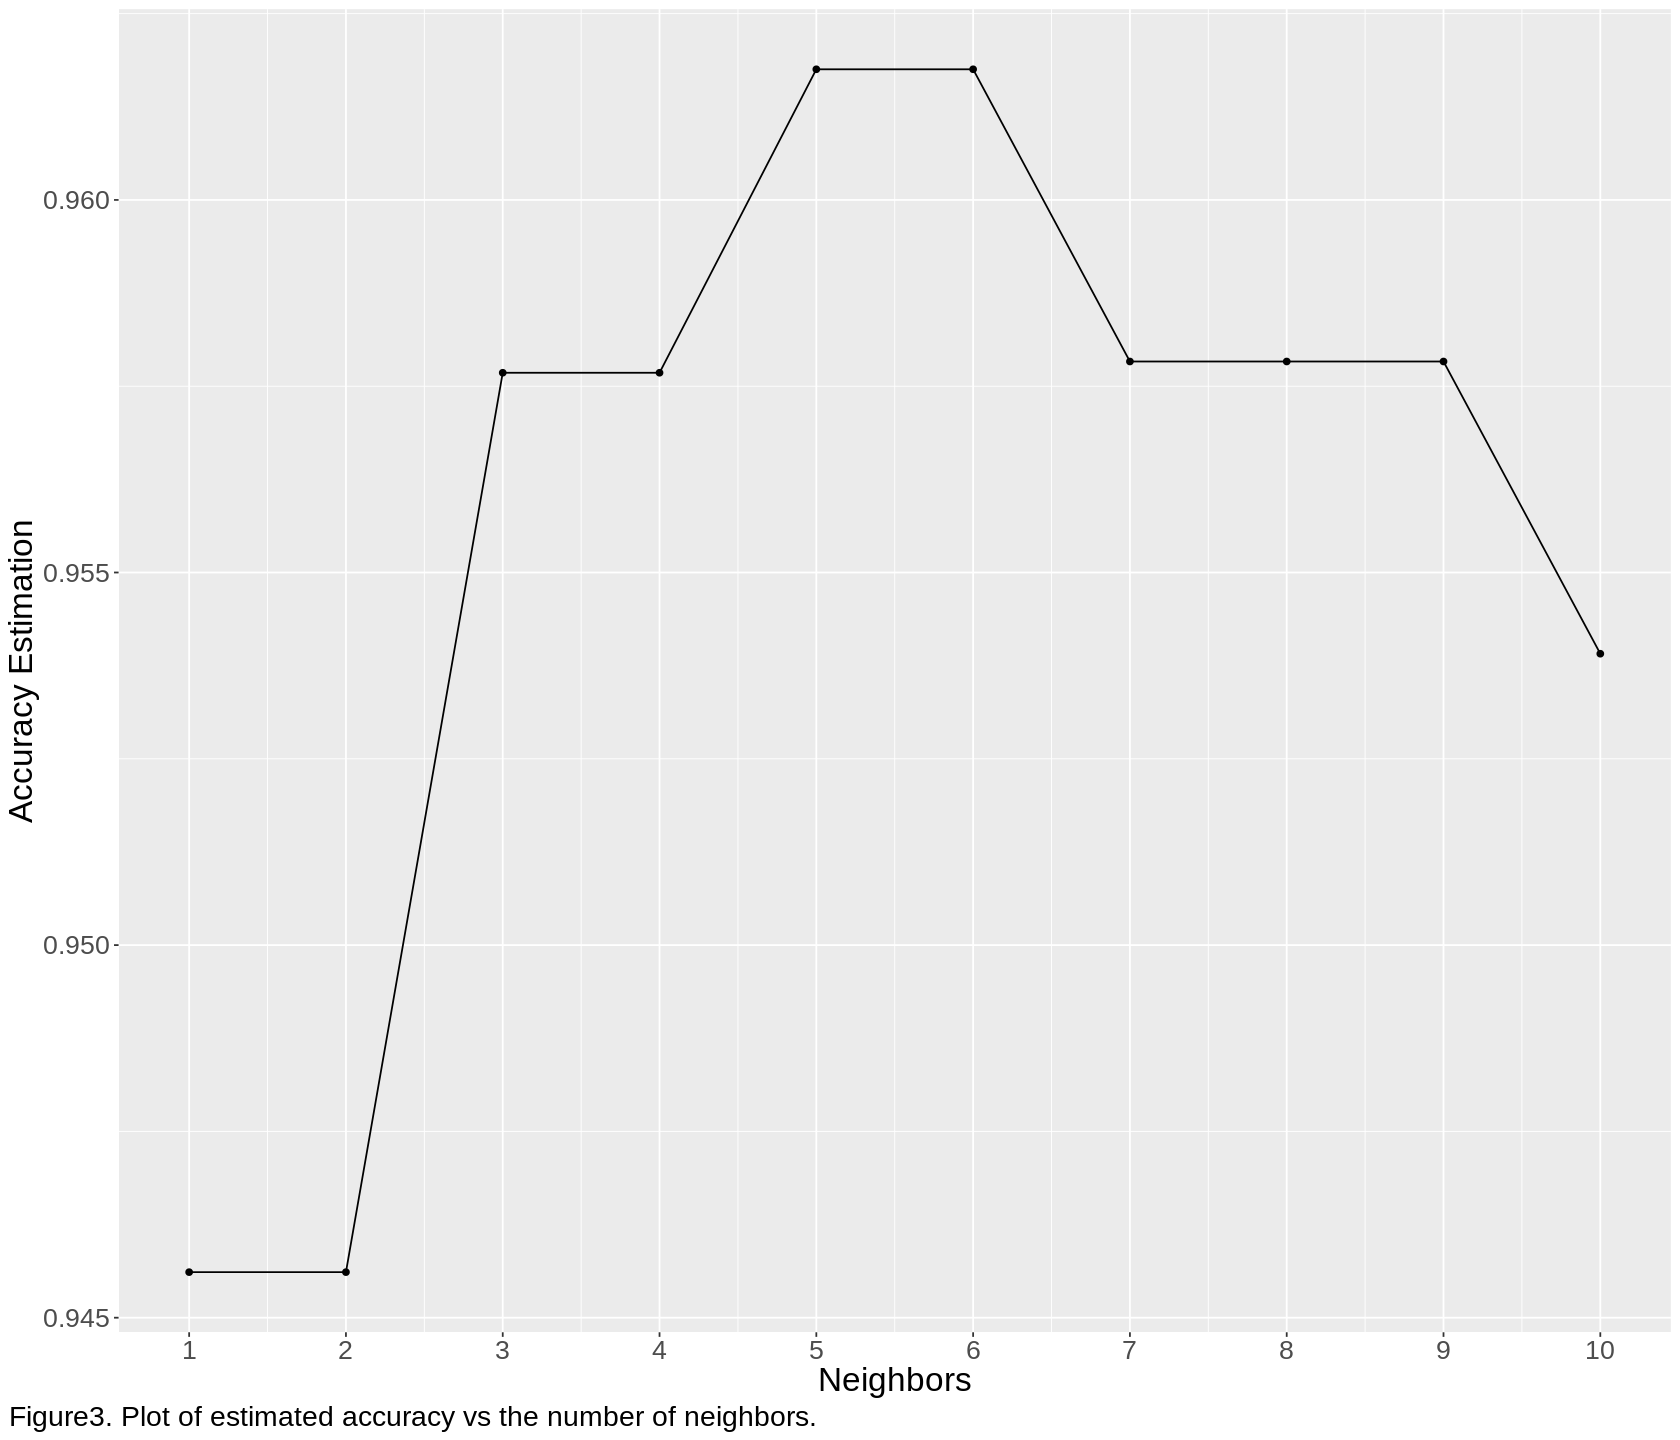

In [33]:
# Data analysis with PEG and LPR as the predictors for UNS

# create a recipe
data_recipe <- recipe(UNS ~ PEG + LPR, data = training_data) %>%
               step_scale(all_predictors()) %>%
               step_center(all_predictors())

# create k-nearest-neighbor model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

# perform 5-fold cross-validation
data_vfold <- vfold_cv(training_data, v = 5, strata = UNS)

# specify k_vals to tune
k_vals <- tibble(neighbors = seq(from = 1, to = 10))

# get the results
data_results <- workflow() %>%
                add_recipe(data_recipe) %>%
                add_model(knn_spec) %>%
                tune_grid(resamples = data_vfold, grid = k_vals) %>%
                collect_metrics()

# filter accuracy
accuracies <- data_results %>%
              filter(.metric == "accuracy")

# plot the accuracy versus k
accuracy_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                 geom_point() +
                 geom_line() +
                 labs(x = "Neighbors", 
                      y = "Accuracy Estimation", 
                      caption = "Figure3. Plot of estimated accuracy vs the number of neighbors.") +
                 theme(text = element_text(size = 20), 
                       plot.caption.position = "plot", 
                       plot.caption = element_text(size = 17, hjust = 0)) +
                 scale_x_continuous(breaks = 1:10)
accuracy_plot

According to the Figure3, the number of neighbors, k = 5 or k = 6 provides the highest accuracy (around 96.35%). Furthermore, estimated accuracy changes by a large amount if we increase or decrease k near k = 5 or k = 6.  And, both k = 5 and k = 6 do not create a prohibitively expensive computational cost of training. However, 5 is an odd number which can avoid the risk of even number ties. Considering all of these four aspects, we would like to select k = 5 for the classifier.

In [34]:
# create the new knn classifier with the "best" of k
new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
                set_engine("kknn") %>%
                set_mode("classification")

# create a new wokflow
knn_fit <- workflow() %>%
           add_recipe(data_recipe) %>%
           add_model(new_knn_spec) %>%
           fit(data = training_data)

# evaluate our model by testing set
testing_data_predictions <- predict(knn_fit, testing_data) %>%
                            bind_cols(testing_data)
testing_data_predictions

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
very_low,0.00,0.10,0.50,0.26,0.05,very_low
low,0.05,0.05,0.55,0.60,0.14,low
high,0.08,0.18,0.63,0.60,0.85,high
⋮,⋮,⋮,⋮,⋮,⋮,⋮
low,0.56,0.60,0.77,0.13,0.32,low
middle,0.66,0.68,0.81,0.57,0.57,middle
middle,0.68,0.64,0.79,0.97,0.24,middle


Table8. The dataframe with an extra .pred_class column added to the original testing data. 

The `UNS` variable contains the true knowledge level of a user, while the `.pred_class` contains the predicted knowledge level of a user from the classifier.

In [35]:
# check the accuracy of our model
test_prediction <- testing_data_predictions %>% 
                   metrics(truth = UNS, estimate = .pred_class) %>%
                   filter(.metric == "accuracy")
test_prediction

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9724138


Table9. The accuracy of the classifier. 

The value of the `.estimate` variable shows that the estimated accuracy of our classifier on the testing data is 97.24%.

In [36]:
# check the confusion matrix
test_confusion <- testing_data_predictions %>%
                  conf_mat(truth = UNS, estimate = .pred_class)
test_confusion

          Truth
Prediction very_low low high middle
  very_low       24   0    0      0
  low             2  45    0      1
  high            0   0   39      0
  middle          0   1    0     33

Table10. The confusion matrix for the classifier.

The confusion matrix shows 24 observations were correctly predicted as very_low, 45 observations were correctly predicted as low, 39 observations were correctly predicted as high, and 33 observations were correctly predicted as middle. Therefore, the classifier labeled 24 + 45 + 39 + 33 = 141 observations correctly. However, it also indicates that the classifier made some small mistakes, in which, it classified 2 observations as low when they were truly very_low, 1 observations as low when they were truly middle, and 1 observations as middle when they were truly low.

## Discussion

#### What we find?
We firstly find that LPR and PEG are the 2 predictors we decide to use in predicting target variable UNS, since both of them show more distinct grouping in scatterplots as well as density plots regarding to UNS. 

Then, we find the optimal value of k is 5 using cross-validation. Since when k = 5, the highest estimated accuracy(around 96.35%) is reached, estimated accuracy changes by only a small amount if we increase or decrease the value of k = 5, k = 5 does not create a prohibitively expensive computational cost of training and 5 is an odd number which avoids the risk of even number ties. 

Finaly, we find the accuracy of our model is around 97.24% using k nearest neighbor classification model with 2 predictors (LPR and UNS).  From the confusion matrix, we see that our model only makes small mistakes when classifying between knowledge levels like very_low versus low, and low versus middle.


#### Summary of expectations of this project

--What are our expectations?

1. We expected to find a positive relationship between PEG, STG, and UNS, and we planned to use PEG and STG to predict UNS.

2. We expected that our k-nearest neighbos classification model with 2 predictors, `LPR` (the exam performance of user for related objects with goal object) and `PEG`(the exam performance of user for goal objects), will be able to predict the `UNS` (the knowledge level of users) with a high accuracy.

--Is this what we expected to find?

1. The expectation of picking predictor variables are different from our findings. According to the Figure1 and Figure2, the distinct coloring groups on the scatterplots and the histogram of LPR regarding to the UNS and that of PEG regarding to the UNS indicates LPR and PEG are better predictors rather than STG(the degree of study time for goal object materails). An interpretation of this inconsistency is that different individuals take different amount of study time. For example, a genius does not need to study for a long time to get a higher exam performance.

2. The expectation of the accuracy of our model is consistent with our result, it achieves a high accuracy around 97.24%. This indicates that our k-nearest-neighbor classification model might be a good one to predict the knowledge level of users. We got a relatively high accuracy of the model may because the 2 predictors (`LPR` and `PEG`) we choose may strongly correlated with target variable `UNS`, which is shown on the scatterplots and density plots Figure1 and Figure2. Also, we uses the cross-validation and finds the optimal value of k, the plot of accuracies vs neighbors is shown in Figure3.

#### What impact could such findings have?

The outcome from this study can inform the development of better education and study strategies to help educational institutions and students. Confirming that higher knowledge level is associated with higher exam performance on both goal objects and related objects, means that educational institutions may add more related materials to the goal objects in lectures and school. They can provide students extra links to related e-book or related videos, and hold extra experiments or presentations to deeper the understanding of the goal objects and broaden students' horizons of the goal objects. Students can also find a better way to gain higher scores in an exam, by not only looking at goal materials but also others beyond and related to goal objects.
    
Furthermore, this findings can provide some ideas to researchers in the field of education to create a more advanced and complete educational system to cultivate the next generation in the future.

#### What future question could this lead to?

  1. Though the accuracy of our k nearest neighbor classification model is relatively high(around 97.24%), are there variables outside the dataset could improve the prediction accuracy?
  2. Is there a better algorithm we can use to analyze this dataset?
  3. Can our classification model be applied to a general population?

## Citation
Dua, D. & Graff, C. (2019). <a href="http://archive.ics.uci.edu/ml" target="_blank">UCI Machine Learning Repository</a>. Irvine, CA: University of California, School of Information and Computer Science.

Hartwig, M. K., Was, C. A., Isaacson, R. M., & Dunlosky, J. (2012). General knowledge monitoring as a predictor of in-class exam performance: <a href="https://doi.org/10.1111/j.2044-8279.2011.02038.x" target ="_blank">General knowledge monitoring</a>. British Journal of Educational Psychology, 82(3), 456-468.

Kahraman, H. T., Sagiroglu, S., & Colak, I. (2013). Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, 283-295.
